<a href="https://colab.research.google.com/github/smridhiwho/asteroid-tracking/blob/main/asteroid_eda_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/smridhiwho/asteroid-tracking/main/asteroid.csv"
df = pd.read_csv(url)
df

,Asteroid Number,Asteroid,N-sig,Ref.,YYYY-mmm-DD,MMD(AU),Vrel(km/s)
0,NaN,1999 TO13,280,JPL#13,10-05-1999,0.0312,14.96
1,NaN,1999 SG10,690,JPL#22,10/14/1999,0.0909,19.77
2,NaN,1999 UR,320,JPL#02,10/22/1999,0.0470,10.01
3,NaN,1999 VF22,300,JPL#02,10/31/1999,0.0372,25.54
4,NaN,1999 VR6,110,JPL#04,11/18/1999,0.0759,21.58
...,...,...,...,...,...,...,...
493,5011.0,Ptah,100000,JPL#08,03-04-2099,0.1219,9.63
494,3361.0,Orpheus,180000,JPL#04,4/26/2099,0.1207,12.18
495,NaN,1997 BR,770000,JPL#05,6/25/2099,0.1912,10.24
496,4581.0,Asclepius,59000,JPL#04,8/23/2099,0.0453,10.28


In [59]:
df=df.drop(['Asteroid Number'],axis=1)
df.rename(columns = {'YYYY-mmm-DD':'Approach Date'}, inplace = True)

In [60]:
df

,Asteroid,N-sig,Ref.,Approach Date,MMD(AU),Vrel(km/s)
0,1999 TO13,280,JPL#13,10-05-1999,0.0312,14.96
1,1999 SG10,690,JPL#22,10/14/1999,0.0909,19.77
2,1999 UR,320,JPL#02,10/22/1999,0.0470,10.01
3,1999 VF22,300,JPL#02,10/31/1999,0.0372,25.54
4,1999 VR6,110,JPL#04,11/18/1999,0.0759,21.58
...,...,...,...,...,...,...
493,Ptah,100000,JPL#08,03-04-2099,0.1219,9.63
494,Orpheus,180000,JPL#04,4/26/2099,0.1207,12.18
495,1997 BR,770000,JPL#05,6/25/2099,0.1912,10.24
496,Asclepius,59000,JPL#04,8/23/2099,0.0453,10.28


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Asteroid       498 non-null    object 
 1   N-sig          498 non-null    int64  
 2   Ref.           498 non-null    object 
 3   Approach Date  498 non-null    object 
 4   MMD(AU)        498 non-null    float64
 5   Vrel(km/s)     498 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [62]:
df.isnull().sum() / len(df) * 100

Asteroid         0.0
N-sig            0.0
Ref.             0.0
Approach Date    0.0
MMD(AU)          0.0
Vrel(km/s)       0.0
dtype: float64

In [63]:
df['Asteroid'].unique()

array(['1999 TO13          ', '1999 SG10          ',
       '1999 UR            ', '1999 VF22          ',
       '1999 VR6           ', '1999 KW4           ',
       '1999 MN            ', '1999 JV6           ',
       '1986 JK            ', '1998 BB10          ',
       'Mithra             ', 'Hathor             ',
       'Toutatis           ', '1994 XL1           ',
       '1998 FG2           ', 'Cuno               ',
       '1998 VD35          ', '1994 WR12          ',
       '1998 WT            ', '1998 SF36          ',
       '1986 PA            ', '1998 HD14          ',
       '1998 ST27          ', '1998 WT24          ',
       'Khufu              ', 'Nereus             ',
       'Orpheus            ', '1999 JT6           ',
       '1999 GU3           ', '1992 FE            ',
       'Adonis             ', '1997 XF11          ',
       '1999 DB7           ', 'Golevka            ',
       '1998 FH12          ', '1994 PM            ',
       '1978 CA            ', '1998 VS        

In [64]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=0.5, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['N-sig', 'MMD(AU)'], ['MMD(AU)', 'Vrel(km/s)']]], **{})
chart

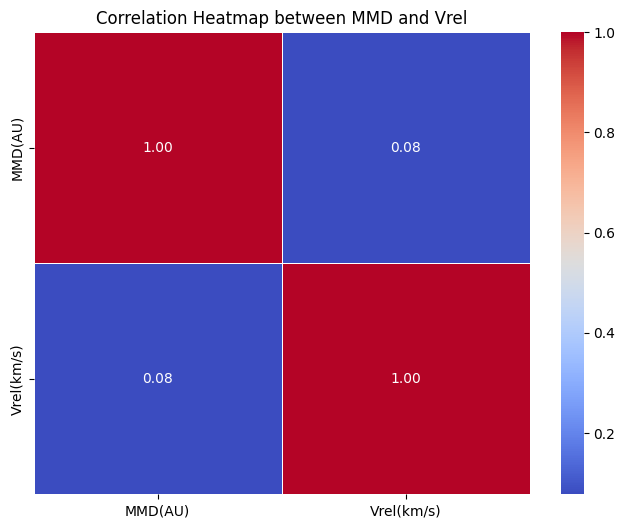

In [65]:
selected_columns = ['MMD(AU)', 'Vrel(km/s)']
selected_data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between MMD and Vrel')
plt.show()

In [66]:
import plotly.express as px
from datetime import datetime
data=df
# Convert 'approach_date' column to datetime format
data['Approach Date'] = pd.to_datetime(data['Approach Date'])

# Input the asteroid name from the user
asteroid_name = input("Enter the asteroid name: ")

# Filter data for the entered asteroid name
filtered_data = data[data['Asteroid'].str.contains(asteroid_name, case=False)]

# Create an interactive timeline using Plotly Express
fig = px.scatter(
    filtered_data,
    x="Approach Date",
    y="Asteroid",
    title=f"Approach Dates for Asteroid: {asteroid_name}",
    labels={"Approach Date": "Approach Date", "Asteroid": "Asteroid Name", "MMD(AU)":"Minimum Approach Distance (in AU)", "Vrel(km/s)":"Relative velocity of the Asteroid"},
)

# Show the interactive timeline
fig.update_traces(marker=dict(size=12, opacity=0.8))
fig.update_xaxes(type='date')
fig.show()


Enter the asteroid name: Mithra


In [67]:
import pandas as pd

# User input for asteroid name
asteroid_name = input("Enter the asteroid name: ")

# Retrieve corresponding data from the dataset
matching_asteroid = df[df['Asteroid'].str.contains(asteroid_name, case=False)]

if not matching_asteroid.empty:
    approach_date = matching_asteroid["Approach Date"].iloc[0]
    mmd = matching_asteroid['MMD(AU)'].iloc[0]
    vrel = matching_asteroid['Vrel(km/s)'].iloc[0]

    print(f"Asteroid: {asteroid_name}")
    print(f"Approach Date	: {approach_date}")
    print(f"MMD(AU): {mmd}")
    print(f"Vrel(km/s): {vrel}")
else:
    print("Asteroid not found in the dataset.")


Enter the asteroid name: Mithra
Asteroid: Mithra
Approach Date	: 2000-08-14 00:00:00
MMD(AU): 0.0465
Vrel(km/s): 17.57


In [50]:
pip install skyfield

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.1/232.1 kB 9.0 MB/s eta 0:00:00


In [73]:
from skyfield.api import load, Topos

# Load asteroid and Earth ephemerides
eph = load('de421.bsp')
ts = load.timescale()

# Get the Earth and asteroid
earth = eph['earth']
asteroid = eph['cuno']  # Replace 'ceres' with your specific asteroid's name

# User input for asteroid name
asteroid_name = input("Enter the asteroid name: ")

# Retrieve corresponding data from the dataset
matching_asteroid = df[df['Asteroid'].str.contains(asteroid_name, case=False)]

if not matching_asteroid.empty:
    approach_date = matching_asteroid['Approach Date'].iloc[0]
    mmd = matching_asteroid['MMD(AU)'].iloc[0]
    vrel = matching_asteroid['Vrel(km/s)'].iloc[0]

    print(f"Asteroid: {asteroid_name}")
    print(f"Approach Date: {approach_date}")
    print(f"MMD(AU): {mmd}")
    print(f"Vrel(km/s): {vrel}")

    # Calculate asteroid position at approach date
    t = ts.utc(approach_date.year, approach_date.month, approach_date.day)
    ast_pos, _ = (earth + Topos(latitude_degrees=0, longitude_degrees=0)).at(t).observe(asteroid).radec()
    print(f"Asteroid position: Altitude = {ast_pos.apparent().altaz()[0].degrees}°, Azimuth = {ast_pos.apparent().altaz()[1].degrees}°")

else:
    print("Asteroid not found in the dataset.")


ValueError: ignored